In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
# Custom palette with specified colors
custom_palette = sns.color_palette(["#33B8C6", "#C64133", "#4682B4"])
# Using a matplotlib colormap
custom_palette2 = sns.color_palette(["#33B8C6","#50C2CE","#6DCCD6","#8AD6DE","#A7E0E6","#C4EAEE","#E1F4F6"])

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#stats
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import explore as e
import model as m
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

In [2]:
# Calling the function that combines all the steps before and creates a .csv file from the df (to run faster and locally)
df = w.prepare_wine(w.red_wine_url, w.white_wine_url)
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
wine_id,,,,,,,,,,,,,
w-1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
w-2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
w-3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


In [3]:
# using the split function to split my data into 60, 20, 20
train, validate, test = m.split_data(df)

In [4]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
wine_id,,,,,,,,,,,,,
w-4568,5.8,0.28,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5,white
w-3787,7.4,0.29,0.48,12.8,0.037,61.5,182.0,0.99808,3.02,0.34,8.8,5,white
r-834,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
r-550,9.0,0.53,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.4,6,red
w-4828,6.7,0.22,0.33,1.2,0.036,36.0,86.0,0.99058,3.10,0.76,11.4,6,white


In [5]:
X_train, y_train = train.drop(columns=['quality','color']), train['quality']
X_validate, y_validate = validate.drop(columns=['quality','color']), validate['quality']
X_test, y_test = test.drop(columns=['quality','color']), test['quality']

In [6]:
# make a scaler:
scaler = MinMaxScaler()
# fit and use a scaler:
X_train_scaled = scaler.fit_transform(X_train)
# use only on validate
X_validate_scaled = scaler.transform(X_validate)
# use only on test:
X_test_scaled = scaler.transform(X_test)
# setting values for train group
X = X_train_scaled
y = y_train

In [7]:
X_train_scaled

array([[0.16528926, 0.13333333, 0.39759036, ..., 0.72868217, 0.18539326,
        0.4057971 ],
       [0.29752066, 0.14      , 0.28915663, ..., 0.23255814, 0.06741573,
        0.11594203],
       [0.6446281 , 0.26      , 0.26506024, ..., 0.51162791, 0.35955056,
        0.27536232],
       ...,
       [0.21487603, 0.09333333, 0.19277108, ..., 0.52713178, 0.09550562,
        0.31884058],
       [0.4214876 , 0.10666667, 0.19879518, ..., 0.21705426, 0.08426966,
        0.5942029 ],
       [0.2231405 , 0.06666667, 0.18674699, ..., 0.59689922, 0.15730337,
        0.31884058]])

# Modeling

In [8]:
# BASELINE
baseline = y.mode()
round(baseline,2)

0    6
Name: quality, dtype: int64

In [9]:
# making a baseline guess dataframe
# that is the same shape as our y variable:
# np.repeat does what it sounds like
baseline_array = np.repeat(baseline, y.shape[0])
baseline_rmse, baseline_r2 = m.evaluate_reg(y, baseline_array)

In [10]:
# setting up a dictionary to add the results of the models
eval_df = pd.DataFrame([{
    'Model': 'baseline',
    'rmse': baseline_rmse,
    'r2': baseline_r2
}])
eval_df

,Model,rmse,r2
0,baseline,0.90158,-0.046374


## MODEL: LassoLars

- train
- Validate

In [11]:
# fit a version of this that has an alpha of 1:
# make it
lasso = LassoLars(alpha=1)
# fit it:
lasso = lasso.fit(X, y)

In [12]:
# Evaluate
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = m.evaluate_reg(y, lasso.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Model': 'lasso',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Model,rmse,r2
0,baseline,0.901580,-0.046374
1,lasso,0.881375,0.000000


In [13]:
# doing the same for validate sample data
val_rmse, val_r2 = m.evaluate_reg(y_validate, lasso.predict(X_validate))
val_dict = pd.DataFrame([{
    'Val_Model': 'lasso',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}])
val_scores = [val_dict]
val_scores.append([val_dict])
val_dict

,Val_Model,val_rmse,val_r2
0,lasso,0.847895,-1.979688e-07


## MODEL: Polynomial Regression

- train
- Validate

In [14]:
# do a preprocessing step with our training data
# x^2
pf2 = PolynomialFeatures(degree=2)
# fit the thing, also use it
x_train_sq = pf2.fit_transform(X)
# use this transformer to change our val and test:
x_val_sq = pf2.transform(X_validate)
x_test_sq = pf2.transform(X_test)

In [15]:
# make a new model for our polynomial regressor:
plyreg2 = LinearRegression()
plyreg2.fit(x_train_sq, y)

LinearRegression()

In [16]:
# pd.concatin into eval the second model on train

rmse, r_2 = m.evaluate_reg(y, plyreg2.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Model': 'quad_reg2',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Model,rmse,r2
0,baseline,0.901580,-0.046374
1,lasso,0.881375,0.000000
2,quad_reg2,0.695629,0.377078


In [17]:
# concating on val_dict to add the second model on validate
val_rmse, val_r2 = m.evaluate_reg(y_validate, plyreg2.predict(x_val_sq))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val_Model': 'quad_reg2',
    'val_rmse': val_rmse,
    'val_r2': val_r2
})])], ignore_index=True, axis=0)
val_scores.append([val_dict])
val_dict

,Val_Model,val_rmse,val_r2
0,lasso,0.847895,-1.979688e-07
1,quad_reg2,21631.119845,-6.508388e+08


In [18]:
# do a preprocessing step with our training data
# x^3
pf3 = PolynomialFeatures(degree=3)
# fit the thing, also use it
x_train_sq = pf3.fit_transform(X)
# use this transformer to change our val and test:
x_val_sq = pf3.transform(X_validate)
x_test_sq = pf3.transform(X_test)

In [19]:
# make a new model for our polynomial regressor:
plyreg3 = LinearRegression()
plyreg3.fit(x_train_sq, y)

LinearRegression()

In [20]:
# pd.concatin into eval the second model on train

rmse, r_2 = m.evaluate_reg(y, plyreg3.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Model': 'quad_reg3',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Model,rmse,r2
0,baseline,0.901580,-0.046374
1,lasso,0.881375,0.000000
2,quad_reg2,0.695629,0.377078
3,quad_reg3,0.637043,0.477585


In [21]:
# concating on val_dict to add the second model on validate
val_rmse, val_r2 = m.evaluate_reg(y_validate, plyreg3.predict(x_val_sq))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val_Model': 'quad_reg3',
    'val_rmse': val_rmse,
    'val_r2': val_r2
})])], ignore_index=True, axis=0)
val_scores.append([val_dict])
val_dict

,Val_Model,val_rmse,val_r2
0,lasso,8.478955e-01,-1.979688e-07
1,quad_reg2,2.163112e+04,-6.508388e+08
2,quad_reg3,3.570312e+07,-1.773078e+15


## MODEL: Ordinary Least Squares (OLS) (3)

- train
- Validate

In [22]:
# initial ML model
lr1 = LinearRegression()

# rfe has entered the chat:
rfe = RFE(lr1, n_features_to_select=3)

# fit
rfe.fit(X, y)

# transform
X_train_rfe = rfe.transform(X)

X_val_rfe = rfe.transform(X_validate_scaled)

In [23]:
# feature that it selected?
rfe.get_feature_names_out()

array(['x1', 'x9', 'x10'], dtype=object)

In [24]:
# lr1 as an object was created for our RFE process,
# lets just use that same object for our first model
lr1.fit(X_train_rfe, y)

LinearRegression()

In [25]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = m.evaluate_reg(y, lr1.predict(X_train_rfe))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Model': 'ols_rfe_3',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Model,rmse,r2
0,baseline,0.901580,-0.046374
1,lasso,0.881375,0.000000
2,quad_reg2,0.695629,0.377078
3,quad_reg3,0.637043,0.477585
4,ols_rfe_3,0.747805,0.280128


In [26]:
# third and final model on val
val_rmse, val_r2 = m.evaluate_reg(y_validate, lr1.predict(X_val_rfe))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val_Model': 'ols_rfe_3',
    'val_rmse': val_rmse,
    'val_r2': val_r2
})])], ignore_index=True, axis=0)
val_dict

,Val_Model,val_rmse,val_r2
0,lasso,8.478955e-01,-1.979688e-07
1,quad_reg2,2.163112e+04,-6.508388e+08
2,quad_reg3,3.570312e+07,-1.773078e+15
3,ols_rfe_3,7.342132e-01,2.501752e-01


## Generalized Linear Model (GLM)

In [27]:
# same process as before!
# make the dang thing!
gams25 = TweedieRegressor(power=0.25)
# fit the dang ol thing
gams25.fit(X, y)
# use it!

TweedieRegressor(power=0.25)

In [28]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = m.evaluate_reg(y, gams25.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Model': 'gamma_ols_0.25',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Model,rmse,r2
0,baseline,0.901580,-0.046374
1,lasso,0.881375,0.000000
2,quad_reg2,0.695629,0.377078
3,quad_reg3,0.637043,0.477585
4,ols_rfe_3,0.747805,0.280128
5,gamma_ols_0.25,0.803950,0.167975


In [29]:
# third and final model on val
val_rmse, val_r2 = m.evaluate_reg(y_validate, gams25.predict(X_validate))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val_Model': 'gamma_ols_0.25',
    'val_rmse': val_rmse,
    'val_r2': val_r2
})])], ignore_index=True, axis=0)
val_dict

,Val_Model,val_rmse,val_r2
0,lasso,8.478955e-01,-1.979688e-07
1,quad_reg2,2.163112e+04,-6.508388e+08
2,quad_reg3,3.570312e+07,-1.773078e+15
3,ols_rfe_3,7.342132e-01,2.501752e-01
4,gamma_ols_0.25,1.070991e+01,-1.585464e+02


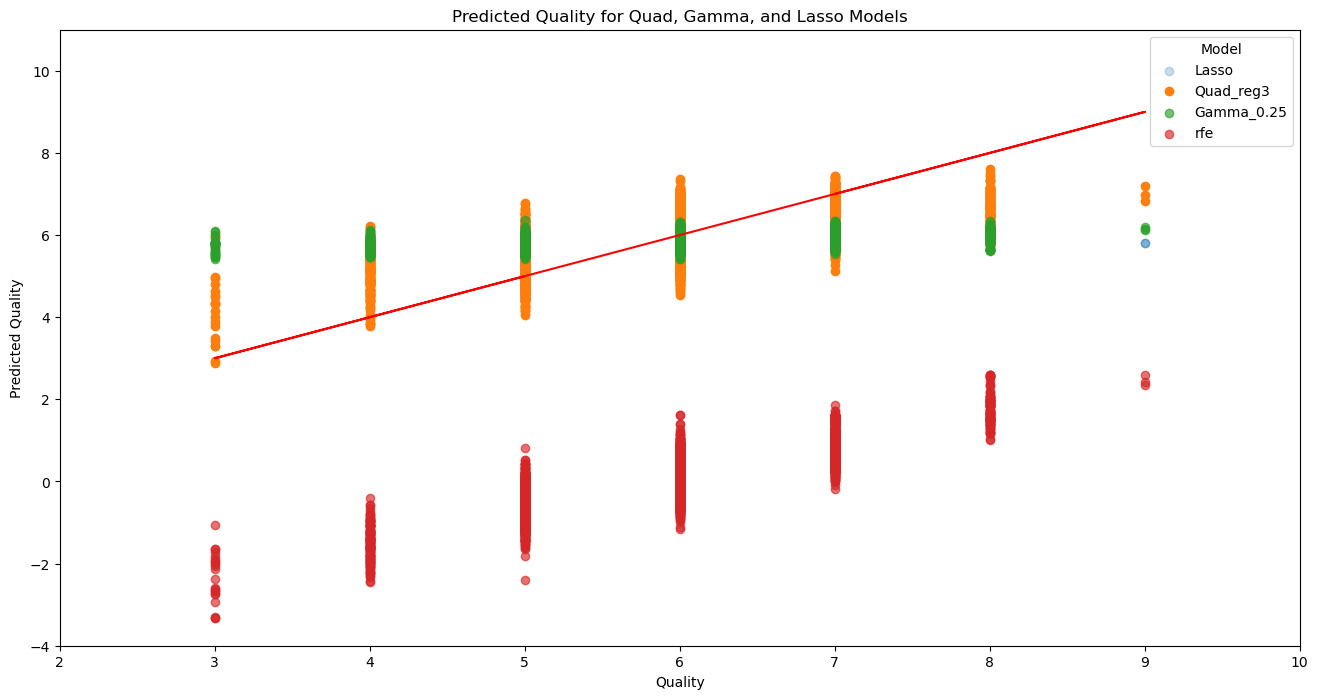

In [30]:
plt.figure(figsize=(16, 8))
plt.scatter(y, lasso.predict(X), label= 'Lasso', alpha=0.25)
plt.scatter(y, plyreg3.predict(x_train_sq), label='Quad_reg3', alpha=1)
plt.scatter(y, gams25.predict(X), label= 'Gamma_0.25', alpha=0.66)
plt.scatter(y, y - lr1.predict(X_train_rfe), label='rfe', alpha=0.65)
plt.title('Predicted Quality for Quad, Gamma, and Lasso Models')
plt.plot(y,y, ls='-', c='r')
plt.ylabel('Predicted Quality')
plt.xlabel('Quality')
plt.legend(title='Model')
# Set the axis limits
plt.xlim(left=2, right=10) 
plt.ylim(bottom=-4, top=11)

plt.show()

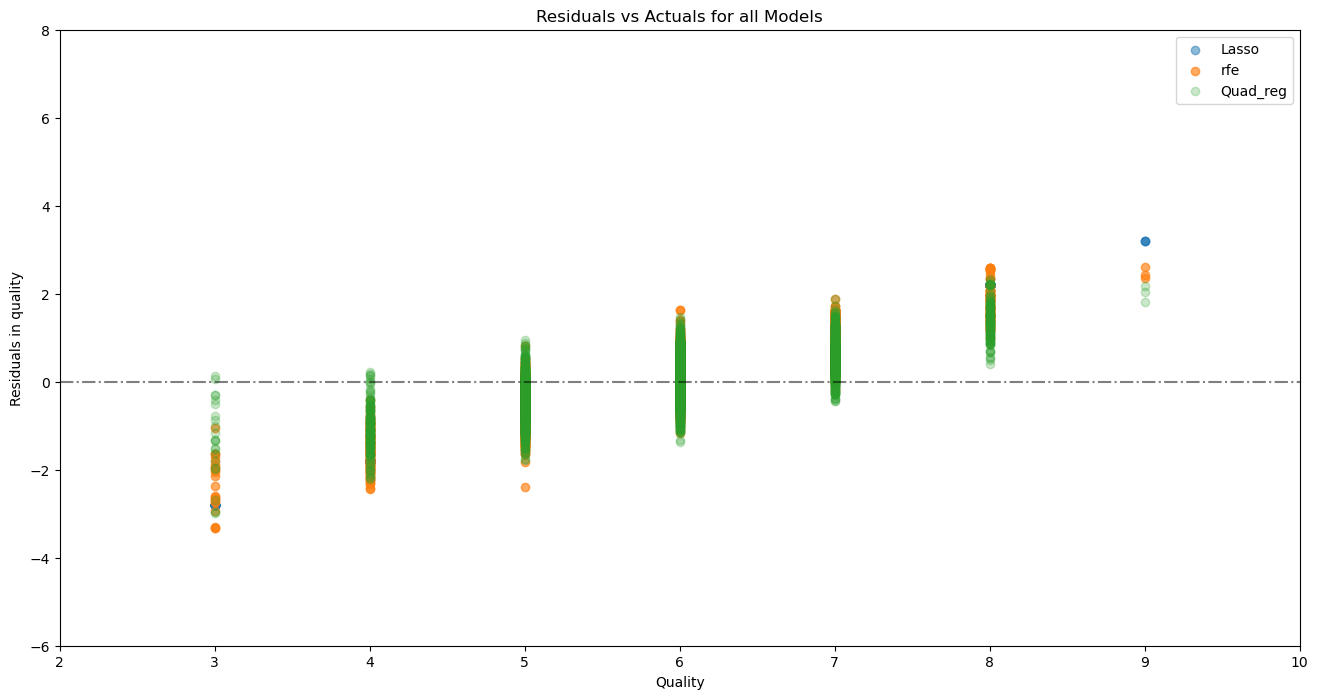

In [31]:
# plotting the residuals of the model as compared to the actual
plt.figure(figsize=(16, 8))
plt.scatter(y, y - lasso.predict(X), label='Lasso', alpha=0.5)
plt.scatter(y, y - lr1.predict(X_train_rfe), label='rfe', alpha=0.65)

plt.scatter(y, y - plyreg3.predict(x_train_sq), label='Quad_reg', alpha=0.25)
plt.title('Residuals vs Actuals for all Models')
plt.axhline(0, ls='-.', c='k', alpha=0.5)
plt.xlabel('Quality')
plt.ylabel('Residuals in quality')
plt.legend()
# Set the axis limits
plt.xlim(left=2, right=10) 
plt.ylim(bottom=-6, top=8)
plt.show()

In [32]:
# assigning variables to the model rmse and r^3
rmse_test, r_2_test = m.evaluate_reg(y_test, plyreg3.predict(x_test_sq))
print(f'With the Polynomial Regression model: rmse on test sample was {round(rmse_test,2)}, and the r^3 was {round(r_2_test,6)}')


With the Polynomial Regression model: rmse on test sample was 32200152.84, and the r^3 was -1382396655440897.0
